# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu. It is updated weekly and I last downloaded the dataset on 8/10/2020.  



## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis and Visualizations 
    IV. Data Modeling
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78753?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78741?</a></li>
><li><a href="#q4"> 4. How are violent crimes, in particular murder and rape, distributed?</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is update weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I originally attempted importing the data into this notebook using Sodapy's Socrata API method but found it cumbersome. Mainly, it didn't want to work with importing the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# Importing essential libraries and configurations
import contextily as cxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
df = pd.read_csv('crime_reports.csv')

# Making a copy to work with later
df2 = df.copy()

In [3]:
# Examining the dataframe
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.duplicated().sum())
print('----------------------------------')
display(df.isnull().sum())

Incident Number     Highest Offense Description  Highest Offense Code  \
0      20183000009              DATING DISTURBANCE                  2400   
1      20141381413              FAMILY DISTURBANCE                  3400   
2      20081002040  CRASH/FAIL STOP AND RENDER AID                  3604   
3      20161971680                             DWI                  2100   
4      20135029070                PROTECTIVE ORDER                  3829   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  10/27/2018 12:03:00 AM    10/27/2018            3.0   
1               N  05/18/2014 07:09:00 PM    05/18/2014         1909.0   
2               N  04/09/2008 07:04:00 PM    04/09/2008         1904.0   
3               N  07/15/2016 10:15:00 PM    07/15/2016         2215.0   
4               N  06/28/2013 12:15:00 PM    06/28/2013         1215.0   

         Report Date Time Report Date  Report Time  \
0  10/27/2018 12:28:00 AM  10/27/2018         28.0   
1  05/18/2014 07:09:00 PM  05/18/2014       1909.0   
2  04/09/2008 09:08:00 PM  04/09/2008       2108.0   
3  07/16/2016 12:22:00 AM  07/16/2016         22.0   
4  06/28/2013 12:15:00 PM  06/28/2013       1215.0   

                  Location Type                  Address  Zip Code  \
0         PARKING LOTS / GARAGE       2201 MONTOPLOIS DR       NaN   
1              RESIDENCE / HOME  12836 BUENOS ARIES PKWY       NaN   
2  STREETS / HWY / ROAD / ALLEY  2500 BLOCK OF GUADALUPE       NaN   
3  STREETS / HWY / ROAD / ALLEY      6000 BLK OF BOLM RD       NaN   
4              RESIDENCE / HOME        COHISE COUNTY  AZ       NaN   

   Council District APD Sector APD District  PRA  Census Tract  \
0               NaN        NaN          NaN  NaN           NaN   
1               NaN        NaN          NaN  NaN           NaN   
2               NaN        NaN          NaN  NaN           NaN   
3               NaN        NaN          NaN  NaN           NaN   
4               NaN        NaN          NaN  NaN           NaN   

  Clearance Status Clearance Date UCR Category Category Description  \
0                N     10/31/2018          NaN                  NaN   
1                N     05/26/2014          NaN                  NaN   
2                N     12/16/2008          NaN                  NaN   
3                C     01/03/2018          NaN                  NaN   
4                N     06/28/2013          NaN                  NaN   

   X-coordinate  Y-coordinate  Latitude  Longitude Location  
0           NaN           NaN       NaN        NaN      NaN  
1           NaN           NaN       NaN        NaN      NaN  
2           NaN           NaN       NaN        NaN      NaN  
3           NaN           NaN       NaN        NaN      NaN  
4           NaN           NaN       NaN        NaN      NaN

----------------------------------


Incident Number  Highest Offense Description  Highest Offense Code  \
2259643      20175007735                   HARASSMENT                  2703   
2259644      20108800371  CRIMINAL TRESPASS/TRANSIENT                  2721   
2259645    2003924076801        BURGLARY OF RESIDENCE                   500   
2259646       2006902409       BURGLARY NON RESIDENCE                   502   
2259647       2010232299           FAMILY DISTURBANCE                  3400   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2259643               N  01/31/2017 10:31:00 AM    01/31/2017         1031.0   
2259644               N  03/29/2010 07:17:00 AM    03/29/2010          717.0   
2259645               N  01/04/2003 06:30:00 PM    01/04/2003         1830.0   
2259646               N  03/31/2006 10:46:00 PM    03/31/2006         2246.0   
2259647               N  01/23/2010 10:44:00 PM    01/23/2010         2244.0   

               Report Date Time Report Date  Report Time  \
2259643  02/23/2017 10:31:00 AM  02/23/2017       1031.0   
2259644  03/29/2010 07:17:00 AM  03/29/2010        717.0   
2259645  01/05/2003 10:31:00 AM  01/05/2003       1031.0   
2259646  03/31/2006 10:46:00 PM  03/31/2006       2246.0   
2259647  01/24/2010 12:14:00 AM  01/24/2010         14.0   

                                Location Type                     Address  \
2259643                      RESIDENCE / HOME             9802 ROXANNA DR   
2259644  CHURCH / SYNAGOGUE / TEMPLE / MOSQUE               203 E 10TH ST   
2259645                      RESIDENCE / HOME             1809 SANCHEZ ST   
2259646          COMMERCIAL / OFFICE BUILDING  6016 OLD FREDERICKSBURG RD   
2259647                      RESIDENCE / HOME            9307 GEORGIAN DR   

         Zip Code  Council District APD Sector APD District  PRA  \
2259643   78748.0               5.0         FR            1  535   
2259644   78701.0               9.0         GE            1  379   
2259645   78702.0               1.0         CH            3  394   
2259646   78749.0               8.0         DA            6   78   
2259647   78753.0               4.0         ED            1  250   

         Census Tract Clearance Status Clearance Date UCR Category  \
2259643         17.47                N     03/16/2017          NaN   
2259644         11.00                N     03/30/2010          NaN   
2259645          8.00                N            NaN          220   
2259646           NaN              NaN     05/10/2006          220   
2259647         18.00                N     02/06/2010          NaN   

        Category Description  X-coordinate  Y-coordinate   Latitude  \
2259643                  NaN     3088221.0     3088221.0  30.176236   
2259644                  NaN     3115283.0     3115283.0  30.271040   
2259645             Burglary     3125587.0     3125587.0  30.281489   
2259646             Burglary     3081299.0     3081299.0  30.234197   
2259647                  NaN     3129098.0     3129098.0  30.360317   

         Longitude                     Location  
2259643 -97.827862  (30.17623555, -97.82786218)  
2259644 -97.739653  (30.27103998, -97.73965326)  
2259645 -97.706719  (30.28148881, -97.70671938)  
2259646 -97.848283    (30.2341966, -97.8482829)  
2259647 -97.693437  (30.36031662, -97.69343723)

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259648 entries, 0 to 2259647
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate 

None

----------------------------------


0

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20859
Address                             12
Zip Code                         13752
Council District                 46799
APD Sector                        8741
APD District                      9209
PRA                              10430
Census Tract                   1356504
Clearance Status                601857
Clearance Date                  332643
UCR Category                   1492376
Category Description           1492376
X-coordinate                      9844
Y-coordinate                      9844
Latitude                         38096
Longitude                

## II. Data Scrubbing

There are several columns of data we won't be using in the analysis, mainly other date and geodata columns. So we'll drop those and also scrub some others. Mainly, we want the zip code and address columns to be free of nulls and duplicates. 

In [4]:
# Create a helper function to aid in data scrubbing
def clean_data(df):
    """Deleting unnecessary columns"""
    drop_col = ['Occurred Date', 'Occurred Time', 'Report Date', 'Report Time', 'Census Tract', 'UCR Category', 
                'Category Description', 'X-coordinate', 'Y-coordinate', 'Location'] 
    df.drop(drop_col, axis=1, inplace=True) 
    """Cleaning essential columns and/or converting their datatype"""
    clean_col = ['Occurred Date Time', 'Zip Code'] 
    df.dropna(subset=clean_col, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    df.zip_code = df.zip_code.astype('int64')
    df.clearance_date = df.clearance_date.astype('datetime64') 
    df.highest_offense_description = df.highest_offense_description.astype('category') 
    df.location_type = df.location_type.astype('category') 
    df.apd_sector = df.apd_sector.astype('category') 
    df.report_date_time = df.report_date_time.astype('datetime64') 
    df['month'] = df['report_date_time'].dt.month
    """Setting the index"""
    df.set_index(['report_date_time'], inplace=True) 
    df.sort_index(inplace=True)
    return df
df = clean_data(df)

I recently discovered that after the initial reshaping and cleaning of a dataframe, when beforehand there were none, duplicates will somehow show. So, to be on the safe side, we are going to recheck for duplicates before moving ahead with exploratory analysis. 

In [5]:
# Rechecking the dataframe 
display(df.isnull().sum())
print('----------------------------------')
display(df.dtypes)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())

incident_number                     0
highest_offense_description         0
highest_offense_code                0
family_violence                     0
occurred_date_time                  0
location_type                   20394
address                             0
zip_code                            0
council_district                33047
apd_sector                          8
apd_district                       11
pra                                11
clearance_status               597396
clearance_date                 329420
latitude                        27505
longitude                       27505
month                               0
dtype: int64

----------------------------------


incident_number                         int64
highest_offense_description          category
highest_offense_code                    int64
family_violence                        object
occurred_date_time                     object
location_type                        category
address                                object
zip_code                                int64
council_district                      float64
apd_sector                           category
apd_district                           object
pra                                    object
clearance_status                       object
clearance_date                 datetime64[ns]
latitude                              float64
longitude                             float64
month                                   int64
dtype: object

----------------------------------


incident_number highest_offense_description  \
report_date_time                                                   
2002-11-29 05:30:00    2002923330284          FAMILY DISTURBANCE   
2003-01-01 00:01:00    2003920010029              DEADLY CONDUCT   
2003-01-01 00:02:00    2003920010046      BURGLARY NON RESIDENCE   
2003-01-01 00:03:00    2003920010048              DEADLY CONDUCT   
2003-01-01 00:06:00    2003920010079  RESISTING ARREST OR SEARCH   

                     highest_offense_code family_violence  \
report_date_time                                            
2002-11-29 05:30:00                  3400               N   
2003-01-01 00:01:00                   408               N   
2003-01-01 00:02:00                   502               N   
2003-01-01 00:03:00                   408               N   
2003-01-01 00:06:00                   905               N   

                         occurred_date_time                 location_type  \
report_date_time                                                            
2002-11-29 05:30:00  01/29/2003 05:30:00 AM              RESIDENCE / HOME   
2003-01-01 00:01:00  01/01/2003 12:01:00 AM              RESIDENCE / HOME   
2003-01-01 00:02:00  01/01/2003 12:02:00 AM  COMMERCIAL / OFFICE BUILDING   
2003-01-01 00:03:00  01/01/2003 12:03:00 AM              RESIDENCE / HOME   
2003-01-01 00:06:00  01/01/2003 12:06:00 AM              RESIDENCE / HOME   

                                    address  zip_code  council_district  \
report_date_time                                                          
2002-11-29 05:30:00         6263 MC NEIL DR     78727               6.0   
2003-01-01 00:01:00  6400 CHIMNEY CREEK CIR     78723               1.0   
2003-01-01 00:02:00       730 W STASSNEY LN     78745               2.0   
2003-01-01 00:03:00     1521 REAGAN HILL DR     78752               4.0   
2003-01-01 00:06:00        2407 CORONADO ST     78702               3.0   

                    apd_sector apd_district  pra clearance_status  \
report_date_time                                                    
2002-11-29 05:30:00         AD            3  183                N   
2003-01-01 00:01:00         ID            4  297                N   
2003-01-01 00:02:00         DA            3  511              NaN   
2003-01-01 00:03:00         ID            2  266                C   
2003-01-01 00:06:00         CH            2  422                C   

                    clearance_date   latitude  longitude  month  
report_date_time                                                 
2002-11-29 05:30:00            NaT  30.441398 -97.747483     11  
2003-01-01 00:01:00            NaT  30.312100 -97.678260      1  
2003-01-01 00:02:00     2003-10-18  30.209853 -97.782088      1  
2003-01-01 00:03:00     2003-01-02  30.325735 -97.689095      1  
2003-01-01 00:06:00     2003-01-01  30.261713 -97.713550      1

----------------------------------


incident_number   highest_offense_description  \
report_date_time                                                     
2020-08-15 19:31:00      20205031958             CRIMINAL MISCHIEF   
2020-08-15 19:46:00      20205031959                         THEFT   
2020-08-15 21:00:00      20205031963           BURGLARY OF VEHICLE   
2020-08-15 21:23:00      20205031965           BURGLARY OF VEHICLE   
2020-08-15 23:32:00      20202280937  POSS CONTROLLED SUB/SYN NARC   

                     highest_offense_code family_violence  \
report_date_time                                            
2020-08-15 19:31:00                  1400               N   
2020-08-15 19:46:00                   600               N   
2020-08-15 21:00:00                   601               N   
2020-08-15 21:23:00                   601               N   
2020-08-15 23:32:00                  1801               N   

                         occurred_date_time                 location_type  \
report_date_time                                                            
2020-08-15 19:31:00  08/14/2020 08:00:00 PM         PARKING LOTS / GARAGE   
2020-08-15 19:46:00  06/15/2020 06:00:00 AM              RESIDENCE / HOME   
2020-08-15 21:00:00  08/15/2020 07:10:00 PM               OTHER / UNKNOWN   
2020-08-15 21:23:00  08/15/2020 06:45:00 PM         PARKING LOTS / GARAGE   
2020-08-15 23:32:00  08/15/2020 03:55:00 PM  STREETS / HWY / ROAD / ALLEY   

                                     address  zip_code  council_district  \
report_date_time                                                           
2020-08-15 19:31:00          1071 CLAYTON LN     78723               4.0   
2020-08-15 19:46:00       7400 BLUE GOOSE RD     78653               NaN   
2020-08-15 21:00:00   5000 PLAZA ON THE LAKE     78746              10.0   
2020-08-15 21:23:00   5000 PLAZA ON THE LAKE     78746              10.0   
2020-08-15 23:32:00  AIRPORT BLVD / MANOR RD     78723               1.0   

                    apd_sector apd_district  pra clearance_status  \
report_date_time                                                    
2020-08-15 19:31:00         ID            5  292              NaN   
2020-08-15 19:46:00         CH            8  765              NaN   
2020-08-15 21:00:00         BA            8  305              NaN   
2020-08-15 21:23:00         BA            8  305              NaN   
2020-08-15 23:32:00         BA            4  900              NaN   

                    clearance_date   latitude  longitude  month  
report_date_time                                                 
2020-08-15 19:31:00            NaT  30.318529 -97.703422      8  
2020-08-15 19:46:00            NaT  30.341265 -97.610045      8  
2020-08-15 21:00:00            NaT  30.349106 -97.801580      8  
2020-08-15 21:23:00            NaT  30.349106 -97.801580      8  
2020-08-15 23:32:00            NaT  30.286292 -97.706367      8

## III. Exploratory Analysis

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

***Note: I am only including zipcodes and crimes, for questions 1 - 3, that >= 1%. Any zipcodes or crime percentages, below 1%, will be discluded to simplify analysis and visualizations.***

78741    203484
78753    175161
78701    166561
78758    155862
78704    152062
78745    148147
78702    135096
78744    123996
78723    116250
78752     83192
78748     66619
78759     64847
78751     62986
78757     56651
78705     56001
78721     46956
78749     39736
78724     36978
78727     35144
78703     34607
78731     27967
78746     27753
78729     25040
78750     23108
Name: zip_code, dtype: int64

----------------------------------


78741    0.090609
78753    0.077997
78701    0.074167
78758    0.069403
78704    0.067711
78745    0.065968
78702    0.060156
78744    0.055214
78723    0.051765
78752    0.037044
78748    0.029665
78759    0.028876
78751    0.028047
78757    0.025226
78705    0.024937
78721    0.020909
78749    0.017694
78724    0.016466
78727    0.015649
78703    0.015410
78731    0.012453
78746    0.012358
78729    0.011150
78750    0.010290
Name: zip_code, dtype: float64

Text(0.5, 1.0, 'Crime Rate by Zipcode')

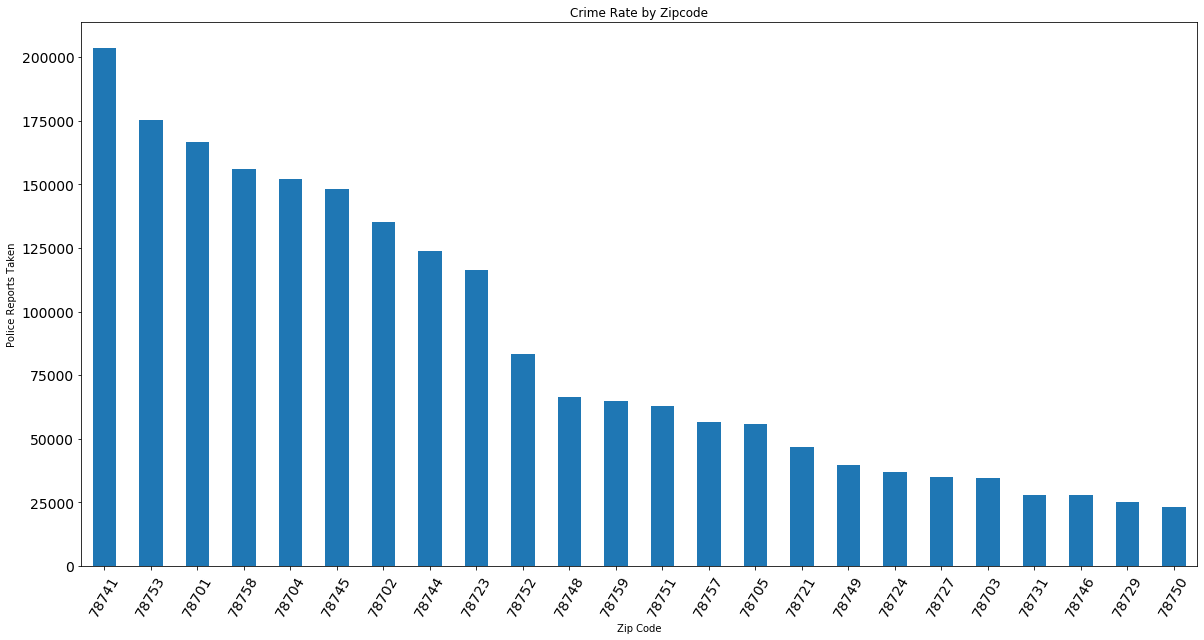

In [10]:
# Create and show dataframe for crime rates by zipcode
zip_codes = df.zip_code.value_counts().head(24)
display(zip_codes)

# Showing the results as percentages
print('----------------------------------')
display(df.zip_code.value_counts(normalize=True).head(24))

zip_codes.plot.bar(figsize=(20,10), fontsize=14, rot=60)

plt.xlabel('Zip Code')
plt.ylabel('Police Reports Taken')
plt.title('Crime Rate by Zipcode')

Out of all the areas in Austin, 78741 has the highest percentage of overall crime at 9.08%. This is a significant 1.3 percentage points higher than the number 2 area 78753 which hosts 7.78% of overall crime.

#### Taking a closer look at particular areas... 

Because 78753 is my resident zipcode, I chose to examine it first. 

Next, I'll examine 78741. 

<a id='q2'></a>
### B. Question 2. How is crime distributed in 78753? 

THEFT                             16883
BURGLARY OF VEHICLE               15704
FAMILY DISTURBANCE                14268
CRIMINAL MISCHIEF                  9215
THEFT BY SHOPLIFTING               7492
ASSAULT W/INJURY-FAM/DATE VIOL     7009
BURGLARY OF RESIDENCE              5995
DWI                                4835
DISTURBANCE - OTHER                4667
CUSTODY ARREST TRAFFIC WARR        4314
HARASSMENT                         4138
AUTO THEFT                         4036
POSS OF DRUG PARAPHERNALIA         3708
PUBLIC INTOXICATION                3338
ASSAULT WITH INJURY                3225
CRIMINAL TRESPASS                  3091
POSS CONTROLLED SUB/NARCOTIC       2927
RUNAWAY CHILD                      2885
WARRANT ARREST NON TRAFFIC         2778
POSSESSION OF MARIJUANA            2679
BURGLARY NON RESIDENCE             2433
VIOL CITY ORDINANCE - OTHER        1860
Name: highest_offense_description, dtype: int64

----------------------------------


THEFT                             0.096386
BURGLARY OF VEHICLE               0.089655
FAMILY DISTURBANCE                0.081456
CRIMINAL MISCHIEF                 0.052609
THEFT BY SHOPLIFTING              0.042772
ASSAULT W/INJURY-FAM/DATE VIOL    0.040015
BURGLARY OF RESIDENCE             0.034226
DWI                               0.027603
DISTURBANCE - OTHER               0.026644
CUSTODY ARREST TRAFFIC WARR       0.024629
HARASSMENT                        0.023624
AUTO THEFT                        0.023042
POSS OF DRUG PARAPHERNALIA        0.021169
PUBLIC INTOXICATION               0.019057
ASSAULT WITH INJURY               0.018412
CRIMINAL TRESPASS                 0.017647
POSS CONTROLLED SUB/NARCOTIC      0.016710
RUNAWAY CHILD                     0.016471
WARRANT ARREST NON TRAFFIC        0.015860
POSSESSION OF MARIJUANA           0.015295
BURGLARY NON RESIDENCE            0.013890
VIOL CITY ORDINANCE - OTHER       0.010619
Name: highest_offense_description, dtype: float64

Text(0.5, 1.0, 'Crime Distribution (78753)')

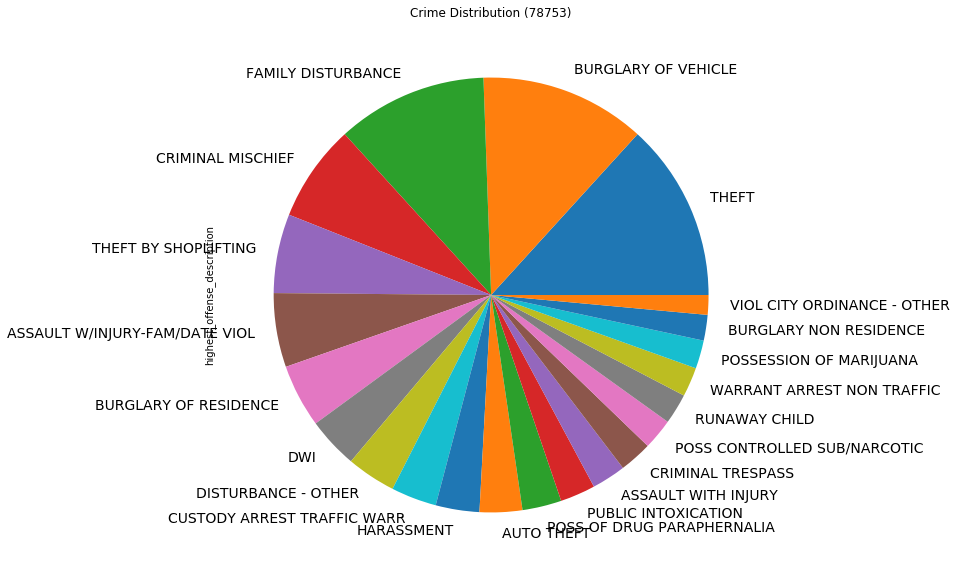

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages 
display(df_53_off)
print('----------------------------------')
display(df_53.highest_offense_description.value_counts(normalize=True).head(22))

df_53_off.plot.pie(figsize=(10,10), fontsize=14, rot=60)
plt.title('Crime Distribution (78753)')

<a id='q3'></a>
### C. Question 3. How is crime distributed in 78741? 

FAMILY DISTURBANCE                19931
BURGLARY OF VEHICLE               19588
THEFT                             15366
CRIMINAL MISCHIEF                 10861
ASSAULT W/INJURY-FAM/DATE VIOL     9528
BURGLARY OF RESIDENCE              8772
PUBLIC INTOXICATION                6354
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5598
HARASSMENT                         5404
DISTURBANCE - OTHER                5078
AUTO THEFT                         4466
ASSAULT WITH INJURY                4464
CRIMINAL TRESPASS                  3827
POSS CONTROLLED SUB/NARCOTIC       3814
POSSESSION OF MARIJUANA            3780
THEFT BY SHOPLIFTING               3542
POSS OF DRUG PARAPHERNALIA         3514
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2766
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.097949
BURGLARY OF VEHICLE               0.096263
THEFT                             0.075515
CRIMINAL MISCHIEF                 0.053375
ASSAULT W/INJURY-FAM/DATE VIOL    0.046824
BURGLARY OF RESIDENCE             0.043109
PUBLIC INTOXICATION               0.031226
CUSTODY ARREST TRAFFIC WARR       0.029540
DWI                               0.027511
HARASSMENT                        0.026557
DISTURBANCE - OTHER               0.024955
AUTO THEFT                        0.021948
ASSAULT WITH INJURY               0.021938
CRIMINAL TRESPASS                 0.018807
POSS CONTROLLED SUB/NARCOTIC      0.018743
POSSESSION OF MARIJUANA           0.018576
THEFT BY SHOPLIFTING              0.017407
POSS OF DRUG PARAPHERNALIA        0.017269
WARRANT ARREST NON TRAFFIC        0.016945
RUNAWAY CHILD                     0.013593
VIOL CITY ORDINANCE - OTHER       0.010787
Name: highest_offense_description, dtype: float64

Text(0.5, 1.0, 'Crime Distribution (78741)')

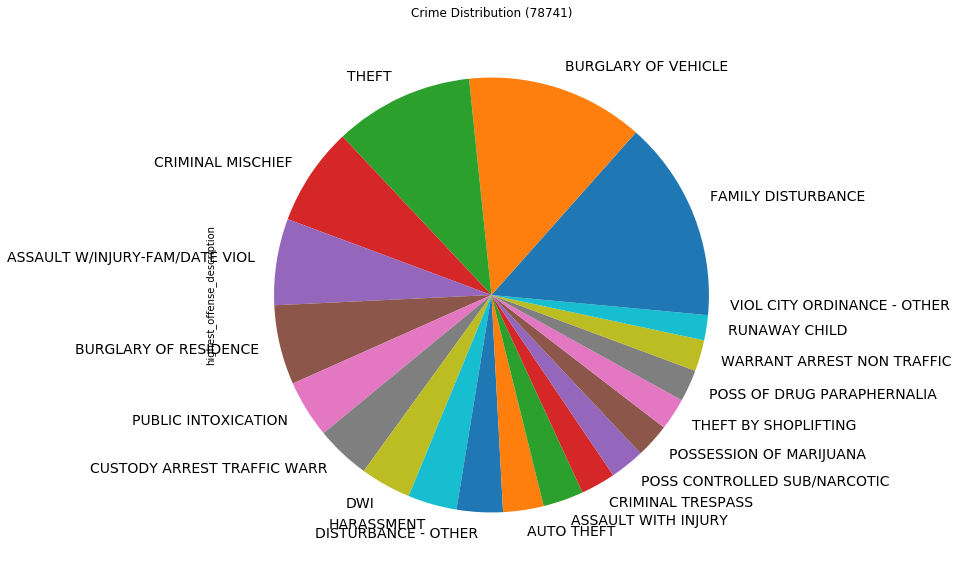

In [12]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# Display the different crime values & then as percentages 
display(df_41_off)
print('----------------------------------')
display(df_41.highest_offense_description.value_counts(normalize=True).head(21))

df_41_off.plot.pie(figsize=(10,10), fontsize=14)
plt.title('Crime Distribution (78741)')

<a id='q4'></a>
### D. Question 4. How are violent crimes, in particular murder, capital murder, and rape, distributed? 

***Note: Only including areas where rape crimes >= 1%.***

----------------------------------
Murder
----------------------------------


78741    42
78753    40
78758    36
78723    33
78744    27
78702    24
78752    21
78745    20
78704    16
78701    16
78721    13
78724    12
78749    10
78751     8
78617     6
78757     6
78705     6
78759     6
78754     5
78727     5
78748     4
78747     4
78750     4
78731     4
Name: zip_code, dtype: int64

----------------------------------


78741    0.109091
78753    0.103896
78758    0.093506
78723    0.085714
78744    0.070130
78702    0.062338
78752    0.054545
78745    0.051948
78704    0.041558
78701    0.041558
78721    0.033766
78724    0.031169
78749    0.025974
78751    0.020779
78617    0.015584
78757    0.015584
78705    0.015584
78759    0.015584
78754    0.012987
78727    0.012987
78748    0.010390
78747    0.010390
78750    0.010390
78731    0.010390
Name: zip_code, dtype: float64

----------------------------------
Capital Murder
----------------------------------


78723    11
78753    11
78758     8
78741     7
78752     6
78745     6
78744     4
78721     3
78748     3
78702     3
78724     2
78727     2
78705     2
78704     2
78757     2
78754     1
78731     1
78759     1
78701     1
78703     1
78722     1
78749     1
Name: zip_code, dtype: int64

----------------------------------


78723    0.139241
78753    0.139241
78758    0.101266
78741    0.088608
78752    0.075949
78745    0.075949
78744    0.050633
78721    0.037975
78748    0.037975
78702    0.037975
78724    0.025316
78727    0.025316
78705    0.025316
78704    0.025316
78757    0.025316
78754    0.012658
78731    0.012658
78759    0.012658
78701    0.012658
78703    0.012658
78722    0.012658
78749    0.012658
Name: zip_code, dtype: float64

----------------------------------
Rape
----------------------------------


78741    499
78753    357
78701    352
78758    310
78745    273
78704    242
78705    205
78744    203
78723    196
78702    181
78752    140
78748    112
78751    110
78759    103
78757     81
78721     73
78724     65
78729     55
78749     53
78731     52
78754     47
Name: zip_code, dtype: int64

----------------------------------


78741    0.121175
78753    0.086693
78701    0.085478
78758    0.075279
78745    0.066294
78704    0.058766
78705    0.049781
78744    0.049296
78723    0.047596
78702    0.043953
78752    0.033997
78748    0.027198
78751    0.026712
78759    0.025012
78757    0.019670
78721    0.017727
78724    0.015784
78729    0.013356
78749    0.012870
78731    0.012627
78754    0.011413
Name: zip_code, dtype: float64

----------------------------------
Aggrivated Assault
----------------------------------


78741    1601
78701    1461
78753    1302
78758    1189
78702    1187
78723    1019
78745     803
78744     768
78752     700
78704     690
78721     501
78724     439
78757     275
78705     259
78748     227
78751     204
Name: zip_code, dtype: int64

----------------------------------


78741    0.113975
78701    0.104008
78753    0.092689
78758    0.084644
78702    0.084502
78723    0.072542
78745    0.057165
78744    0.054674
78752    0.049833
78704    0.049121
78721    0.035666
78724    0.031252
78757    0.019577
78705    0.018438
78748    0.016160
78751    0.014523
Name: zip_code, dtype: float64

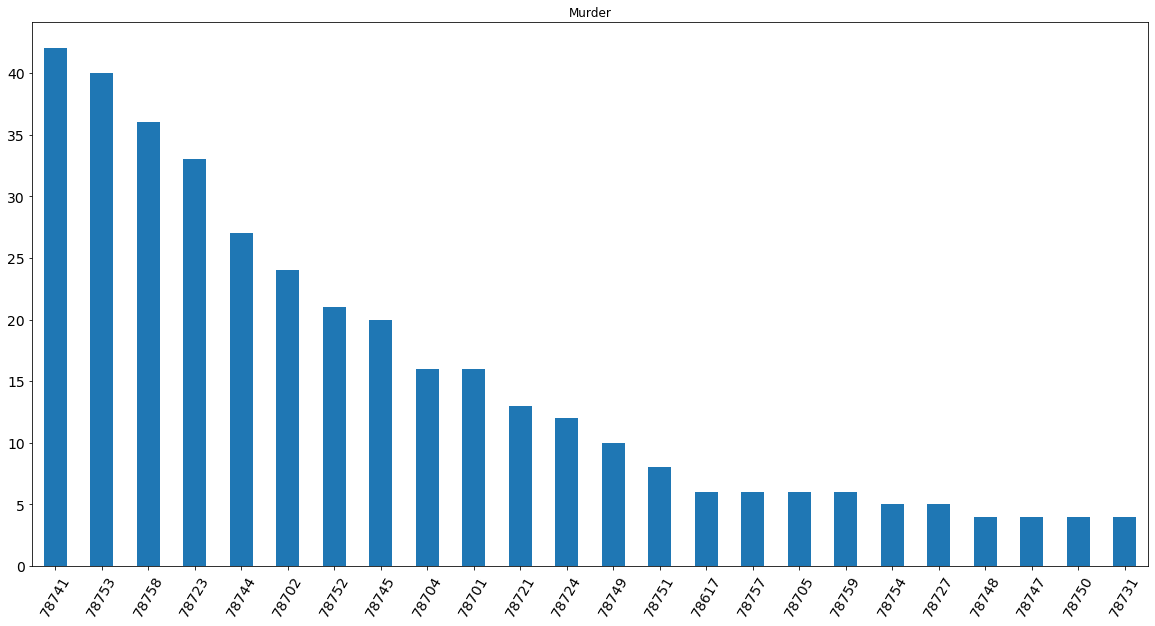

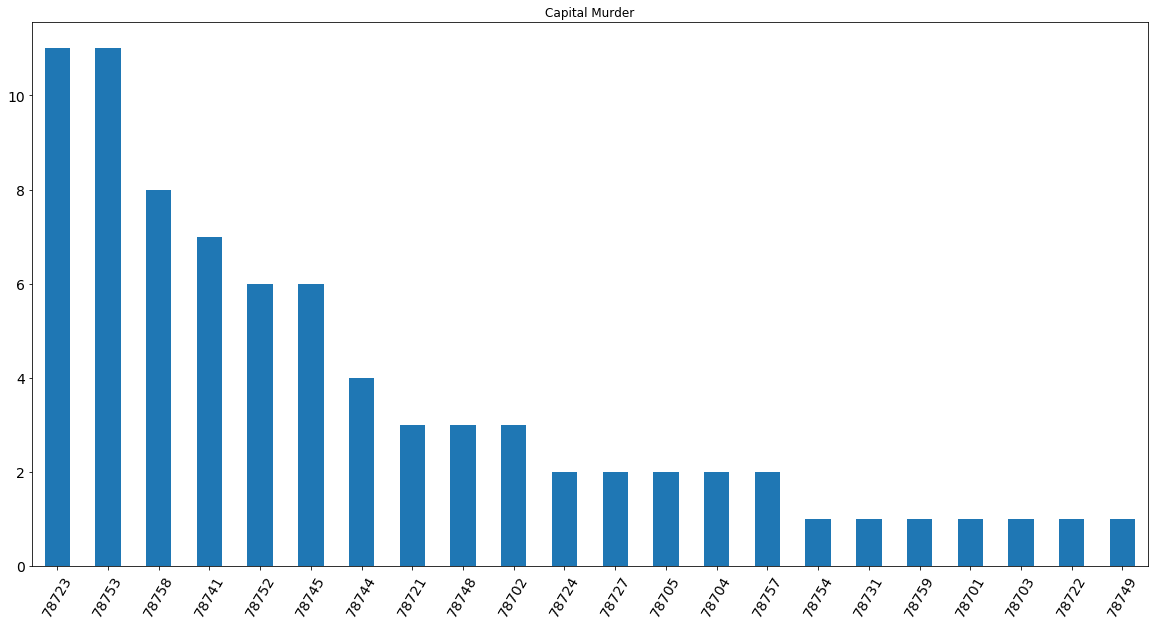

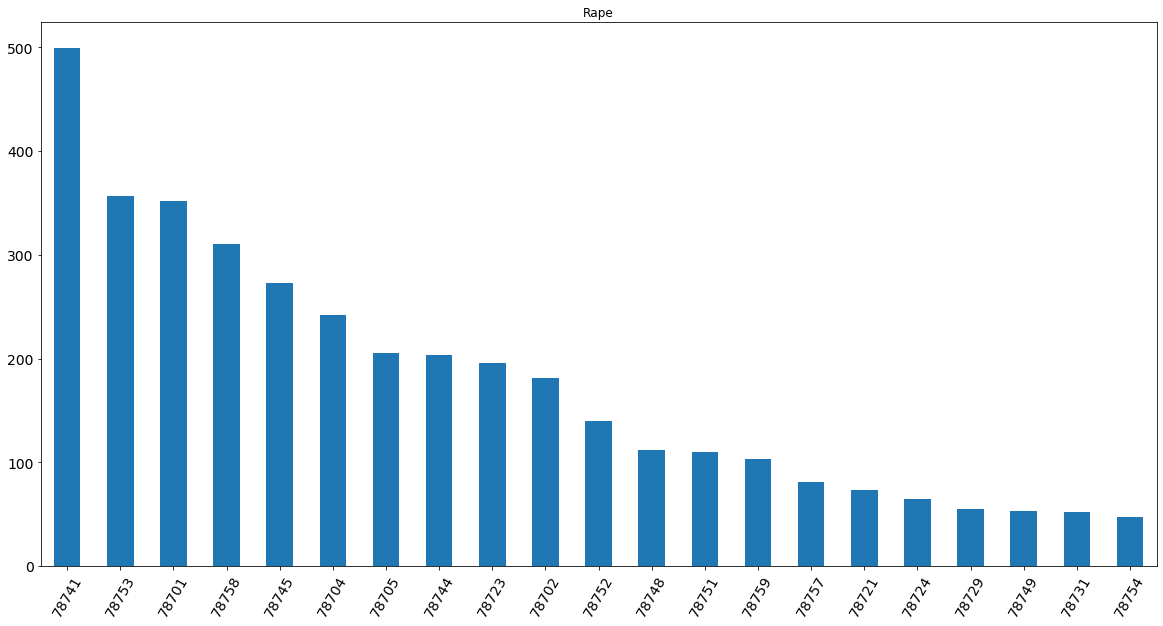

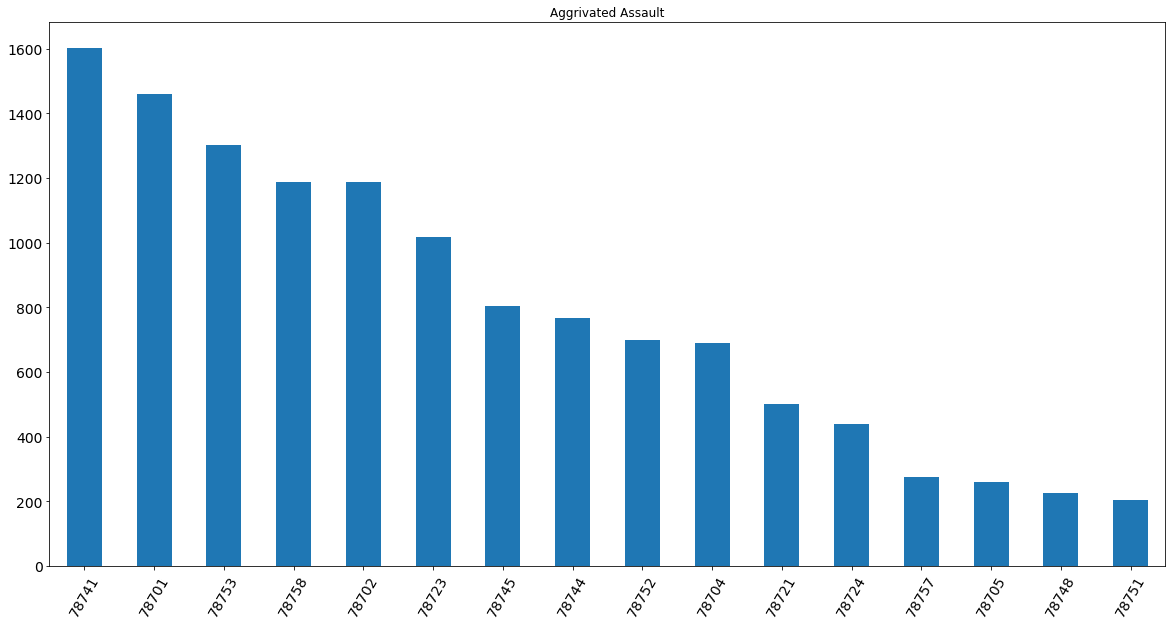

In [13]:
# Create a dataframe for murders, capital murders, and rapes
df_mur = df[df.highest_offense_description == 'MURDER']
df_mur_cap = df[df.highest_offense_description == 'CAPITAL MURDER']
df_rape = df[df.highest_offense_description == 'RAPE']
df_agg_asslt = df[df.highest_offense_description == 'AGG ASSAULT']

# What are the top zipcodes for murders? 
print('----------------------------------')
print('Murder')
print('----------------------------------')
df_mur_val = df_mur.zip_code.value_counts().head(24)
display(df_mur_val)
print('----------------------------------')
display(df_mur.zip_code.value_counts(normalize=True).head(24))

# What are the top zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murder')
print('----------------------------------')
df_mur_cap_val = df_mur_cap.zip_code.value_counts()
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap.zip_code.value_counts(normalize=True))

# What are the top 10 zipcodes for rape? 
print('----------------------------------')
print('Rape')
print('----------------------------------')
df_rape_val = df_rape.zip_code.value_counts().head(21)
display(df_rape_val)
print('----------------------------------')
display(df_rape.zip_code.value_counts(normalize=True).head(21))

print('----------------------------------')
print('Aggrivated Assault')
print('----------------------------------')
df_agg_asslt_val = df_agg_asslt.zip_code.value_counts().head(16)
display(df_agg_asslt_val)
print('----------------------------------')
display(df_agg_asslt.zip_code.value_counts(normalize=True).head(16))
        

df_mur_val.plot.bar(figsize=(20,10), rot=60, fontsize=14)
plt.title('Murder')
plt.show()

df_mur_cap_val.plot.bar(figsize=(20,10), rot=60, fontsize=14)
plt.title('Capital Murder')
plt.show()

df_rape_val.plot.bar(figsize=(20,10), fontsize=14, rot=60)
plt.title('Rape')
plt.show()

df_agg_asslt_val.plot.bar(figsize=(20,10), fontsize=14, rot=60)
plt.title('Aggrivated Assault')
plt.show()

#### Showing Murder, Capital Murder, Rape, and Aggrivated Assault on the map...

***Note: I attempted to use the Contextily library in order to add a basemap to the following plots but was unsuccessful.***

78741    2149
78701    1830
78753    1710
78758    1543
78702    1395
78723    1259
78745    1102
78744    1002
78704     950
78752     867
78721     590
78724     518
78705     472
78757     364
78748     346
78751     322
78759     234
Name: zip_code, dtype: int64

78741    0.115358
78701    0.098234
78753    0.091792
78758    0.082828
78702    0.074883
78723    0.067583
78745    0.059155
78744    0.053787
78704    0.050996
78752    0.046540
78721    0.031671
78724    0.027806
78705    0.025337
78757    0.019539
78748    0.018573
78751    0.017285
78759    0.012561
Name: zip_code, dtype: float64

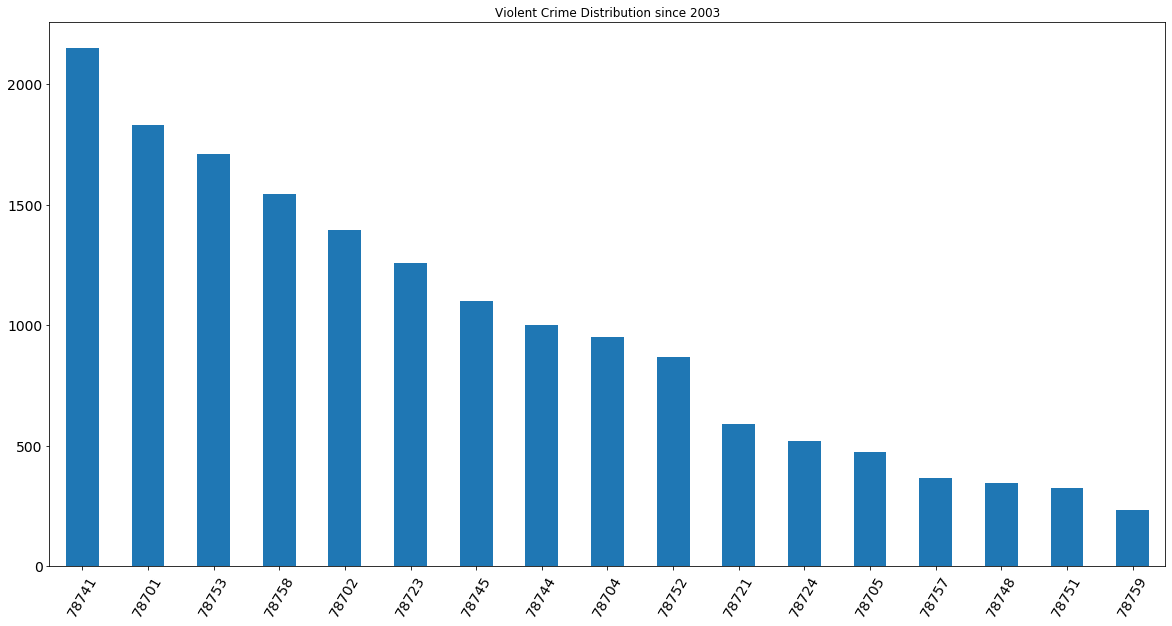

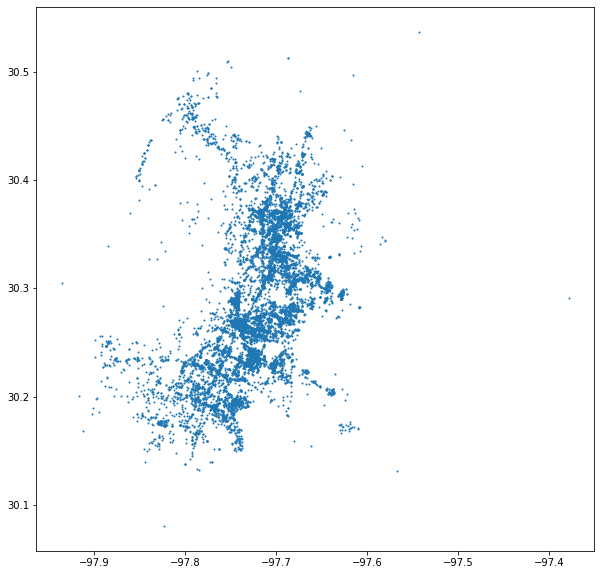

In [14]:
df_viol = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER", "RAPE", "AGG ASSAULT"]') 

df_viol_zip = df_viol.zip_code.value_counts().head(17)
display(df_viol_zip)
display(df_viol.zip_code.value_counts(normalize=True).head(17))

df_viol_zip.plot.bar(figsize=(20,10), fontsize=14, rot=60)
plt.title('Violent Crime Distribution since 2003')
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df_viol['longitude'], df_viol['latitude'], 'o', markersize=1)
plt.show()

month  highest_offense_description
1      AGG ASSAULT                    1067
       RAPE                            341
       MURDER                           24
       CAPITAL MURDER                    8
2      AGG ASSAULT                     988
       RAPE                            274
       MURDER                           18
       CAPITAL MURDER                    4
3      AGG ASSAULT                    1231
       RAPE                            363
       MURDER                           34
       CAPITAL MURDER                    5
4      AGG ASSAULT                    1213
       RAPE                            340
       MURDER                           35
       CAPITAL MURDER                   14
5      AGG ASSAULT                    1420
       RAPE                            348
       MURDER                           25
       CAPITAL MURDER                    3
6      AGG ASSAULT                    1308
       RAPE                            410
       MURDER      

month  highest_offense_description
1      AGG ASSAULT                    0.740972
       RAPE                           0.236806
       MURDER                         0.016667
       CAPITAL MURDER                 0.005556
2      AGG ASSAULT                    0.769470
       RAPE                           0.213396
       MURDER                         0.014019
       CAPITAL MURDER                 0.003115
3      AGG ASSAULT                    0.753827
       RAPE                           0.222290
       MURDER                         0.020821
       CAPITAL MURDER                 0.003062
4      AGG ASSAULT                    0.757179
       RAPE                           0.212235
       MURDER                         0.021848
       CAPITAL MURDER                 0.008739
5      AGG ASSAULT                    0.790646
       RAPE                           0.193764
       MURDER                         0.013920
       CAPITAL MURDER                 0.001670
6      AGG ASSAULT       

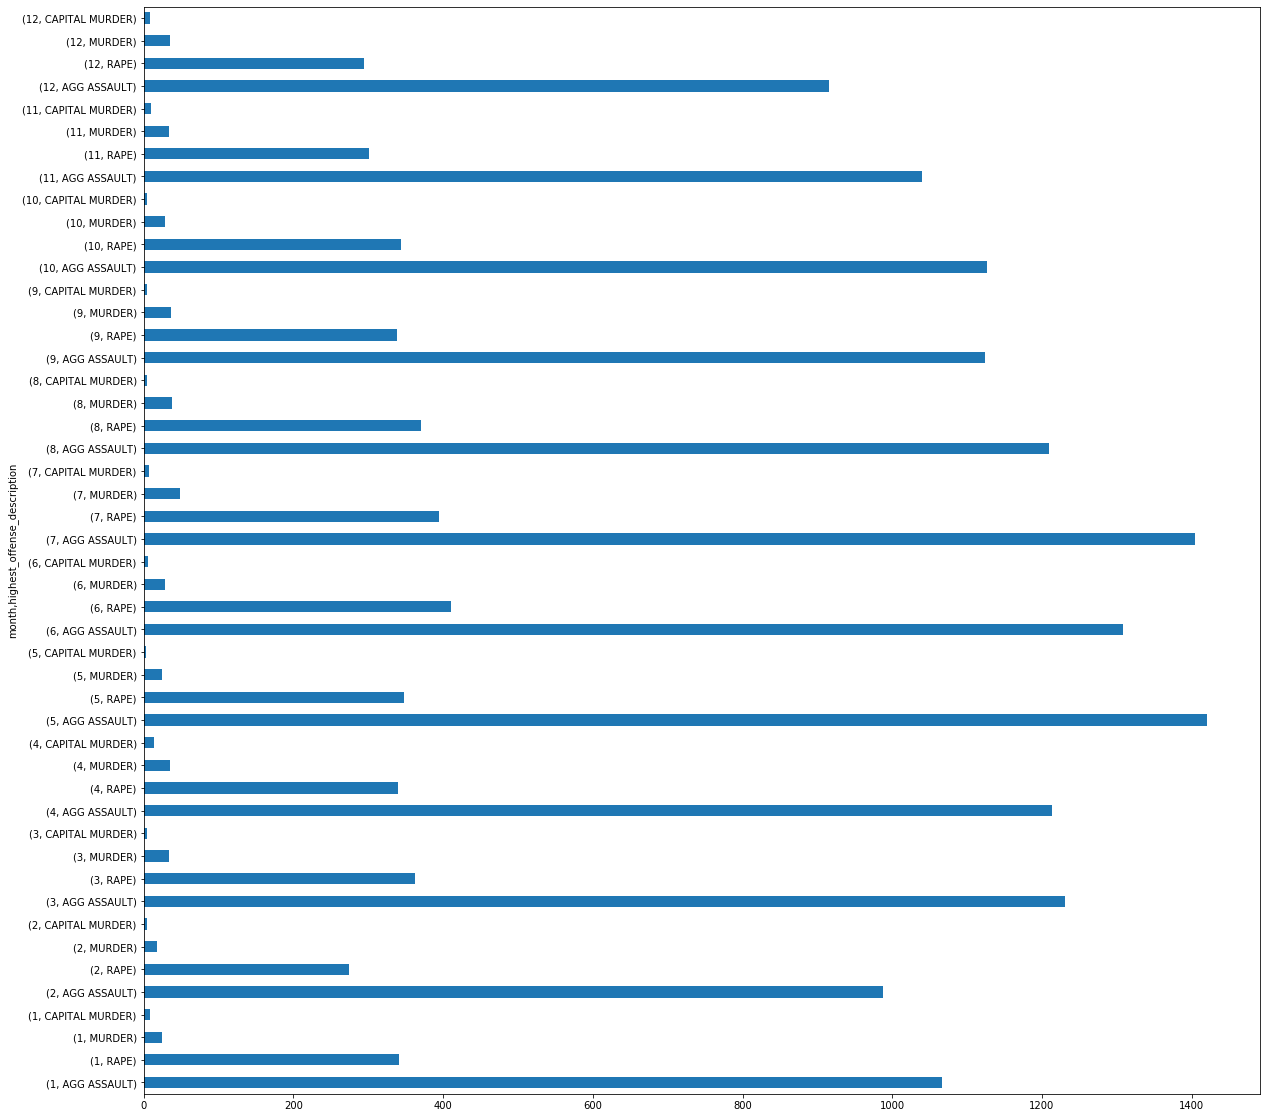

In [45]:
viol_month = df_viol.groupby(df_viol['month'])['highest_offense_description'].value_counts()
display(viol_month)
display(df_viol.groupby(df_viol['month'])['highest_offense_description'].value_counts(normalize=True))

fig, axs = plt.subplots(figsize=(20,20))
df_viol.groupby(df_viol['month'])['highest_offense_description'].value_counts().plot.barh(ax=axs)
plt.show()

In [ ]:
viol_month.to_csv('datasets\viol_month.csv')

In [15]:
viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
display(viol_freq)

highest_offense_description  AGG ASSAULT  CAPITAL MURDER  MURDER  RAPE
zip_code                                                              
78610                                  1               0       0     0
78613                                 14               0       1     6
78617                                117               0       6    36
78621                                  1               0       0     0
78634                                  1               0       0     0
78652                                  2               0       0     0
78653                                  8               0       1     1
78660                                 64               0       2    17
78664                                  3               0       0     0
78681                                  1               0       0     1
78701                               1461               1      16   352
78702                               1187               3      24   181
78703                                 55               1       0    35
78704                                690               2      16   242
78705                                259               2       6   205
78712                                  1               0       0     1
78717                                 35               0       1    12
78719                                 10               0       0     1
78721                                501               3      13    73
78722                                115               1       0    39
78723                               1019              11      33   196
78724                                439               2      12    65
78725                                 22               0       0    11
78726                                 34               0       0    35
78727                                 95               2       5    41
78728                                  7               0       1     4
78729                                 87               0       2    55
78730                                 13               0       0     8
78731                                 47               1       4    52
78732                                  1               0       0     1
78733                                  1               0       0     0
78735                                 82               0       3    11
78736                                 19               0       0     9
78737                                  2               0       0     2
78738                                  1               0       0     0
78739                                  7               0       0     5
78741                               1601               7      42   499
78742                                 36               0       2     8
78744                                768               4      27   203
78745                                803               6      20   273
78746                                 39               0       2    29
78747                                 55               0       4    27
78748                                227               3       4   112
78749                                 99               1      10    53
78750                                 69               0       4    31
78751                                204               0       8   110
78752                                700               6      21   140
78753                               1302              11      40   357
78754                                 92               1       5    47
78756                                 62               0       2    38
78757                                275               2       6    81
78758                               1189               8      36   310
78759                                124               1       6   103

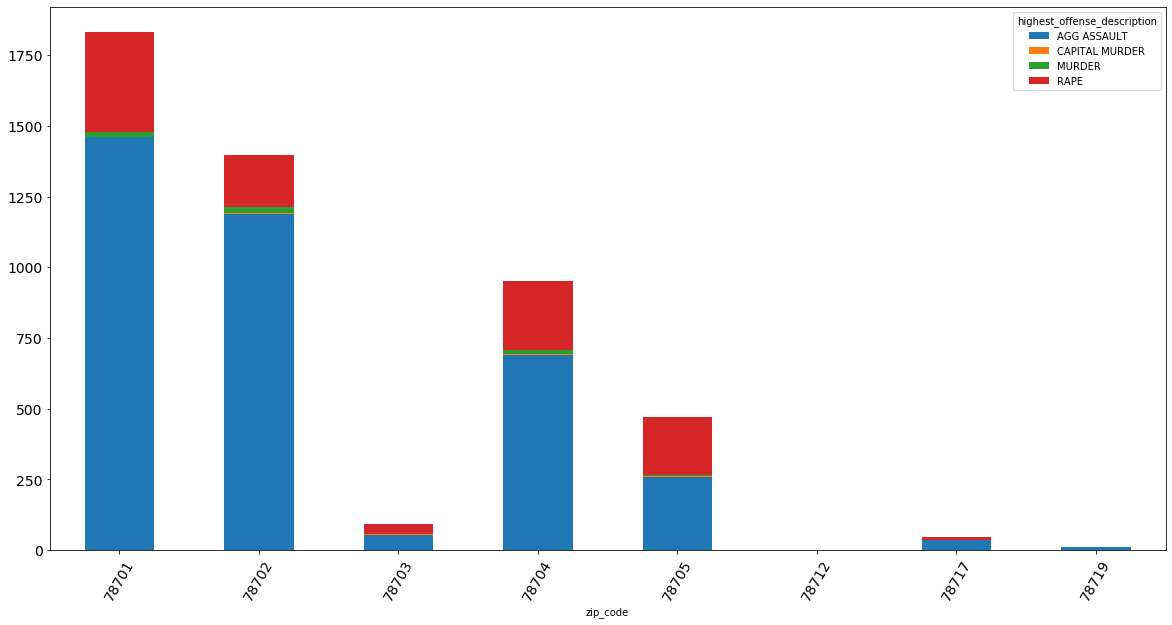

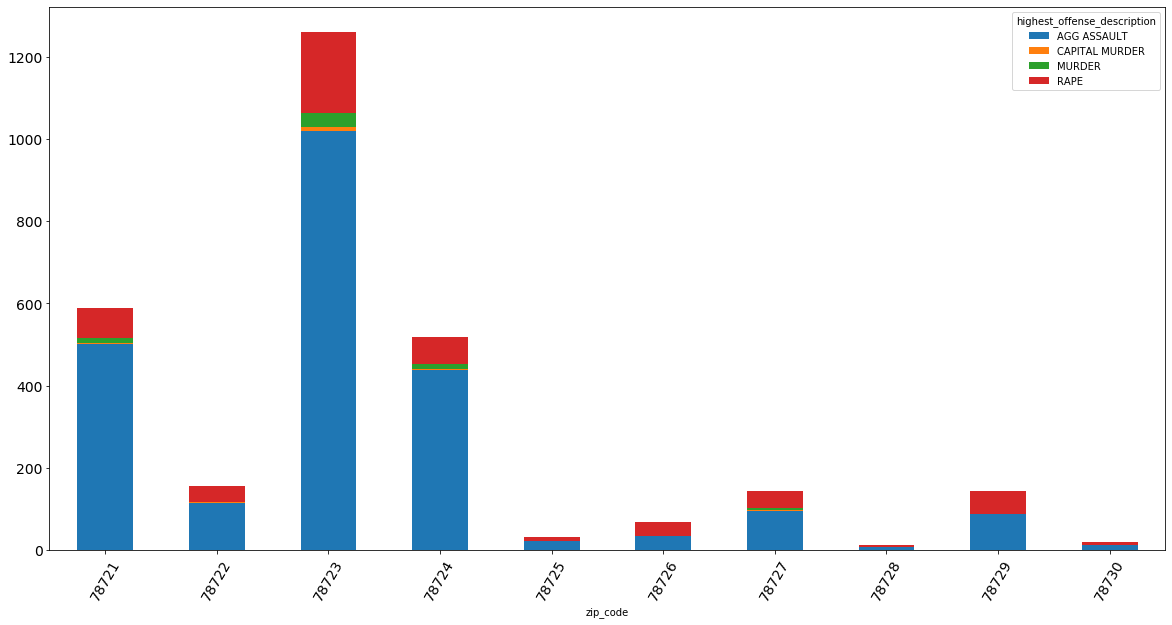

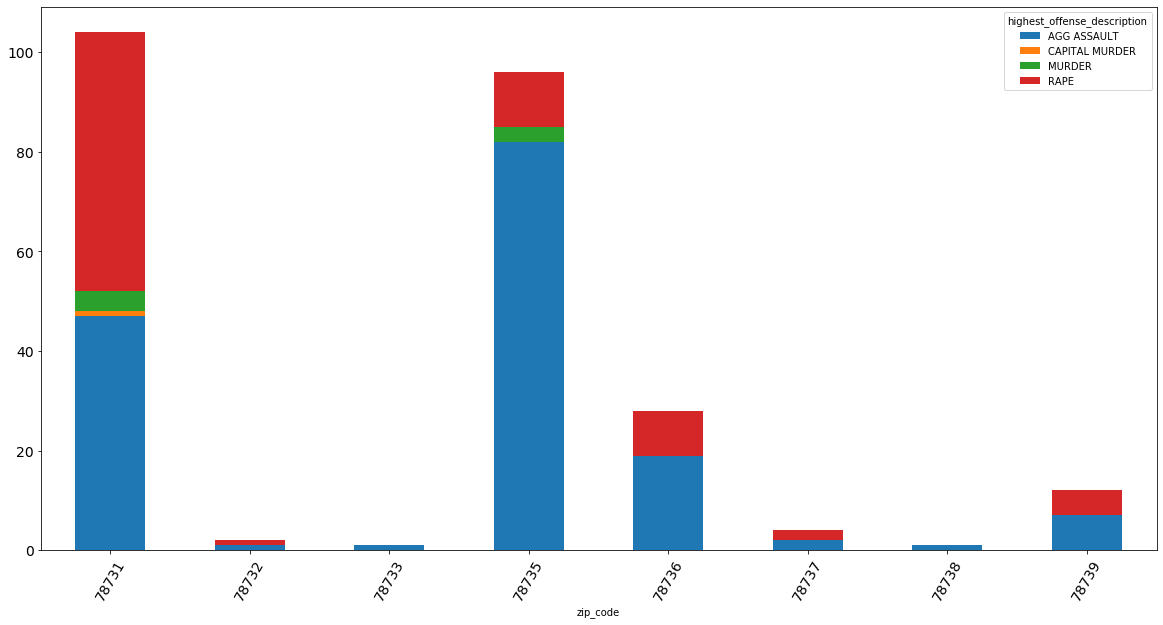

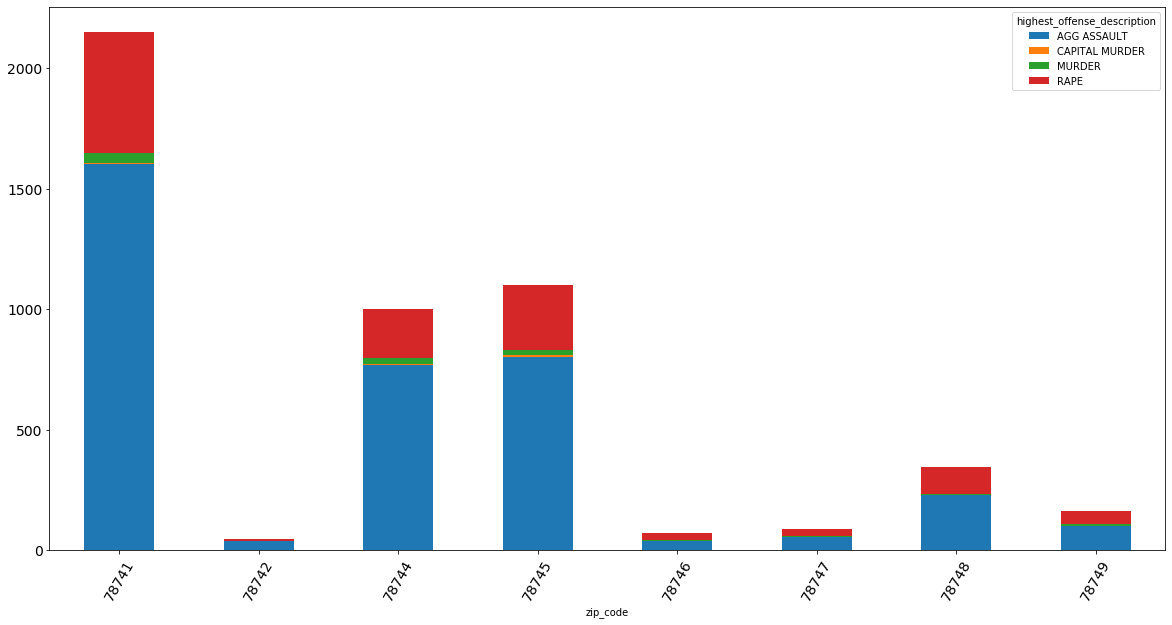

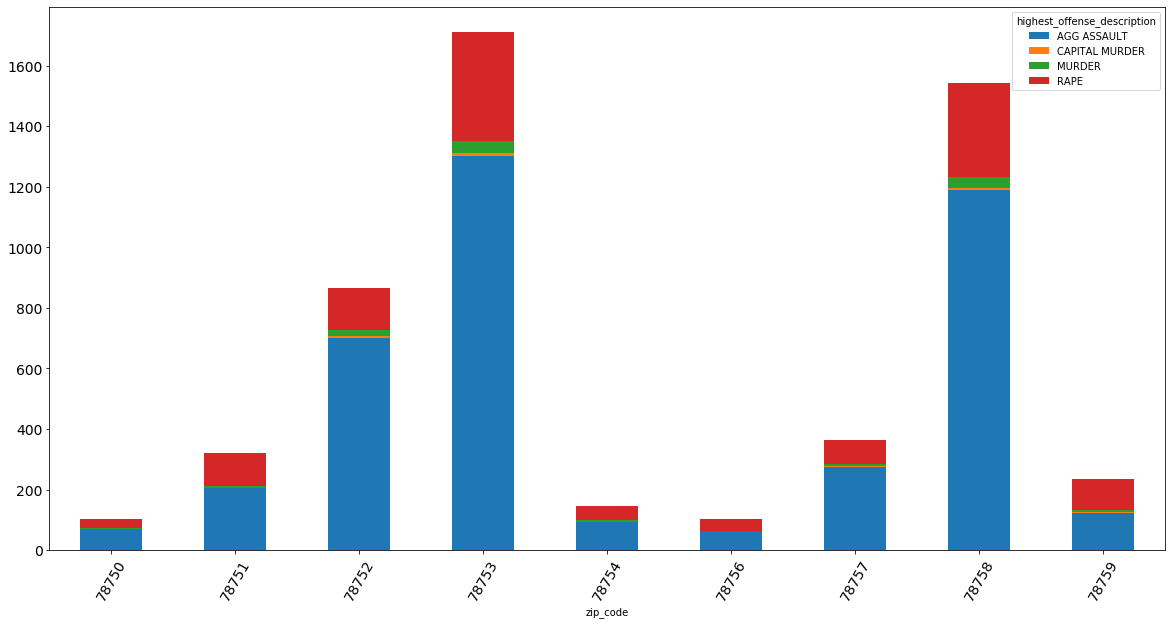

In [46]:
viol_freq_1 = viol_freq.loc['78701':'78720']
viol_freq_2 = viol_freq.loc['78721':'78730']
viol_freq_3 = viol_freq.loc['78731':'78740']
viol_freq_4 = viol_freq.loc['78741':'78749']
viol_freq_5 = viol_freq.loc['78750':'78760']

viol_freq_1.plot.bar(figsize=(20,10), stacked=True, fontsize=14, rot=60)
plt.show()

viol_freq_2.plot.bar(figsize=(20,10), stacked=True, fontsize=14, rot=60)
plt.show()

viol_freq_3.plot.bar(figsize=(20,10), stacked=True, fontsize=14, rot=60)
plt.show()

viol_freq_4.plot.bar(figsize=(20,10), stacked=True, fontsize=14, rot=60)
plt.show()

viol_freq_5.plot.bar(figsize=(20,10), stacked=True, fontsize=14, rot=60)
plt.show()

In [17]:
viol_freq.corr()

highest_offense_description  AGG ASSAULT  CAPITAL MURDER    MURDER      RAPE
highest_offense_description                                                 
AGG ASSAULT                     1.000000        0.809643  0.935589  0.940655
CAPITAL MURDER                  0.809643        1.000000  0.912452  0.776006
MURDER                          0.935589        0.912452  1.000000  0.896301
RAPE                            0.940655        0.776006  0.896301  1.000000

So far, 78753 and 78741 are the top hotspots for all sorts of crime in Austin, including violent crime.

For non-capital murder, 78741 comes in at number 1 with 10.91%. 

#### ***It is important to note that murder does not necessarily make the defendant(s) automatically eligible for the death penalty. Under Texas law, we distinguish capital murder, through the motives and actions of the defendant(s) during the commission of a homicide, as whether or not automatically warranting an eventual date with the executioner. This includes such things as if the homicide was premeditated or not, if the defendant(s) murdered a police officer, etc.***

Regarding capital murder, 78723 comes in to share the number one spot with 78753, with a rate of 13.92% each. The 78741 area drops to the number 3 spot, carrying 8.97%.

So, if we're honest, 78753 actually is the number 1 hotspot for murder because it has played host to 40 non-capital murders and 11 capital murders in total, meaning it has hosted 11% of all murders. 78741, if we combine all murders, only accounts for 10.56% of the total since 2003. 

Next, 78741 climbs back to claim the number 1 spot for rape at 12.09% -- 3.43 percentage points higher than the number 2 spot 78753 carrying 8.66% which is quite a significant lead when you look at it on the graph!! Why does rape occur so much more often in this area than in others? 



In the next part of the analysis, we'll look even closer at all the above data... 